# Table of contents
1 . Introduction: Business Problem                                                                                
2 . Data                                                                                                          
3 . Methodology                                                                                                   
4 . Analysis                                                                                                      
5 . Results and Discussion                                                                                        
6 . Conclusion                                                                                                              

Introduction: Business Problem ¶
This project deals with discussing the neighborhoods of Visakhapatnam,India. This project would specifically help Business people planning to start Restaurants, Hotels, etc. in Visakhapatnam, Andhrapradesh, India.

The Foursquare API is used to access the venues in the neighborhoods. Since, it returns less venues in the neighborhoods, we would be analysing areas for which countable number of venues are obtained. Then they are clustered based on their venues using Data Science Techniques. Here the k-means clustering algorithm is used to achieve the task.Folium visualization library can be used to visualize the clusters superimposed on the map of Chennai city. These clusters can be analyzed to help small scale business owners select a suitable location for their need such as Hotels, Shopping Malls, Restaurants or even specifically Indian restaurants or Coffee shops.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim
try:
    import geocoder
except:
    !pip install geocoder
    import geocoder

import requests
from bs4 import BeautifulSoup

try:
    import folium
except:
    !pip install folium
    import folium
    
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# install wordcloud
!pip install wordcloud
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


You should consider upgrading via the 'c:\users\shree\anaconda3\python.exe -m pip install --upgrade pip' command.


Getting the Location

In [3]:
#Getting the location of Vizag city using the geocoder package
g = geocoder.arcgis('Visakhapatnam, India')
vskp_lat = g.latlng[0]
vskp_lng = g.latlng[1]
print("The Latitude and Longitude of Visakhapatnam is {} and {}".format(vskp_lat, vskp_lng))

The Latitude and Longitude of Visakhapatnam is 17.719840000000033 and 83.26278000000008


In [4]:
#Scraping the Wikimedia webpage for list of localities present in Bangalore city
neig = requests.get("https://commons.wikimedia.org/wiki/Category:Suburbs_of_Visakhapatnam").text

In [5]:
#parsing the scraped content
soup = BeautifulSoup(neig, 'html.parser')

In [6]:
#Creating a list to store neighborhood data
neighborhoodlist = []

In [7]:
#Searching the localities using class labels and appending it to the neighborhood list
for i in soup.find_all('div', class_='mw-category')[0].find_all('a'):
    neighborhoodlist.append(i.text)

#Creating a dataframe from the list
neig_df = pd.DataFrame({"Locality": neighborhoodlist})
neig_df.head()

,Locality
0,Adavivaram
1,Aganampudi
2,Arilova
3,Bakkannapalem
4,Bheemunipatnam


In [8]:
neig_df.shape

(27, 1)

4.Getting the location of the Localities

In [9]:
#Defining a function to get the location of the localities
def get_location(localities):
    g = geocoder.arcgis('{}, Visakhapatnam, India'.format(localities))
    get_latlng = g.latlng
    return get_latlng

In [10]:
#Creating an empty list
co_ordinates = []
#Getting the co-ordinates of each locality using the function defined above
for i in neig_df["Locality"].tolist():
    co_ordinates.append(get_location(i))
print(co_ordinates)

[[17.785830000000033, 83.25242000000009], [17.689040000000034, 83.13988000000006], [17.768430000000023, 83.31107000000003], [17.803680000000043, 83.33904000000007], [17.889380000000074, 83.45031000000006], [17.769980000000032, 82.27119000000005], [17.708630000000028, 83.16466000000008], [17.68083000000007, 83.20209000000006], [17.71580000000006, 83.30750000000006], [17.82433000000003, 83.34058000000005], [17.739550000000065, 83.32080000000008], [17.747730000000047, 83.25717000000003], [17.808170000000075, 83.34362000000004], [17.708290000000034, 83.31033000000008], [17.838500000000067, 83.35868000000005], [17.74051000000003, 83.24869000000007], [17.750050000000044, 83.25141000000008], [17.764530000000036, 83.30326000000008], [17.743690000000072, 83.33119000000005], [17.754101145760867, 83.21567340591179], [17.629290000000026, 83.07980000000003], [17.692440000000033, 83.28748000000007], [17.740670000000023, 83.31072000000006], [17.71927000000005, 83.19642000000005], [17.779770000000042,

In [11]:
co_ordinates[:5]

[[17.785830000000033, 83.25242000000009],
 [17.689040000000034, 83.13988000000006],
 [17.768430000000023, 83.31107000000003],
 [17.803680000000043, 83.33904000000007],
 [17.889380000000074, 83.45031000000006]]

In [12]:
#Creating a dataframe from the list of location co-ordinates
co_ordinates_df = pd.DataFrame(co_ordinates, columns=['Latitudes', 'Longitudes'])

In [13]:
#Adding co-ordinates of localities to neig_df dataframe
neig_df["Latitudes"] = co_ordinates_df["Latitudes"]
neig_df["Longitudes"] = co_ordinates_df["Longitudes"]

In [14]:
print("The shape of neig_df is {}".format(neig_df.shape))
neig_df.head()

The shape of neig_df is (27, 3)


,Locality,Latitudes,Longitudes
0,Adavivaram,17.78583,83.25242
1,Aganampudi,17.68904,83.13988
2,Arilova,17.76843,83.31107
3,Bakkannapalem,17.80368,83.33904
4,Bheemunipatnam,17.88938,83.45031


In [15]:
neig_df.columns

Index(['Locality', 'Latitudes', 'Longitudes'], dtype='object')

In [16]:
neig_df['Locality']

0                     Adavivaram
1                     Aganampudi
2                        Arilova
3                  Bakkannapalem
4                 Bheemunipatnam
5                      Boyapalem
6                        Duvvada
7                       Gajuwaka
8               Jagadamba Centre
9                        Kommadi
10                  Maddilapalem
11                  Madhavadhara
12                   Madhurawada
13                  Maharanipeta
14                  Marikavalasa
15                    Marripalem
16       Midhilapuri VUDA Colony
17                   Mudasarlova
18                    MVP Colony
19                    Naiduthota
20                      Parawada
21      Port Area, Visakhapatnam
22                Seethammadhara
23    Sheelanagar, Visakhapatnam
24                   Simhachalam
25      Suryabagh, Visakhapatnam
26                       Yendada
Name: Locality, dtype: object

In [17]:
map_vskp = folium.Map(location=[vskp_lat, vskp_lng], zoom_start=10)

# add markers to map
for lat, lng in zip(neig_df['Latitudes'], neig_df['Longitudes']):
    label = '{}'.format(neig_df['Locality'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vskp)  
map_vskp

Lets use FOURSQUARE API to explore the neighbourhood

In [18]:
CLIENT_ID = 'LIBCLXHFCE2P55HOQP0G25DJXWXDZ4BLUML50EU0UU0EHZQP' # your Foursquare ID
CLIENT_SECRET = 'GM2X5HHKUB3VRA0BI3IHGBOINQQKENC1DG3OQIMJTQLCPDFJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Successfully Logged-In')

Successfully Logged-In


In [19]:
neig_df['Locality'].shape

(27,)

Explore Localities in Visakhapatnam

In [20]:
LIMIT = 100

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
Visakhapatnam_venues = getNearbyVenues(names=neig_df['Locality'],
                                        latitudes=neig_df['Latitudes'], 
                                        longitudes=neig_df['Longitudes'], radius=500)

Adavivaram
Aganampudi
Arilova
Bakkannapalem
Bheemunipatnam
Boyapalem
Duvvada
Gajuwaka
Jagadamba Centre
Kommadi
Maddilapalem
Madhavadhara
Madhurawada
Maharanipeta
Marikavalasa
Marripalem
Midhilapuri VUDA Colony
Mudasarlova
MVP Colony
Naiduthota
Parawada
Port Area, Visakhapatnam
Seethammadhara
Sheelanagar, Visakhapatnam
Simhachalam
Suryabagh, Visakhapatnam
Yendada


In [23]:
print(Visakhapatnam_venues.shape)
Visakhapatnam_venues.head()

(62, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aganampudi,17.68904,83.13988,Domino's Pizza,17.686542,83.139156,Pizza Place
1,Arilova,17.76843,83.31107,GSN PET CLINIC,17.765692,83.312883,Pet Service
2,Bakkannapalem,17.80368,83.33904,Ravi's,17.804363,83.342161,Smoke Shop
3,Bakkannapalem,17.80368,83.33904,ravi ka thota,17.807009,83.339605,Campground
4,Bakkannapalem,17.80368,83.33904,Apollo Pharmacy,17.804428,83.342990,Pharmacy


In [24]:
Visakhapatnam_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aganampudi,1,1,1,1,1,1
Arilova,1,1,1,1,1,1
Bakkannapalem,3,3,3,3,3,3
Bheemunipatnam,1,1,1,1,1,1
Gajuwaka,5,5,5,5,5,5
Jagadamba Centre,5,5,5,5,5,5
MVP Colony,4,4,4,4,4,4
Madhavadhara,4,4,4,4,4,4
Madhurawada,2,2,2,2,2,2


In [25]:
print('There are {} uniques categories.'.format(len(Visakhapatnam_venues['Venue Category'].unique())))

There are 38 uniques categories.


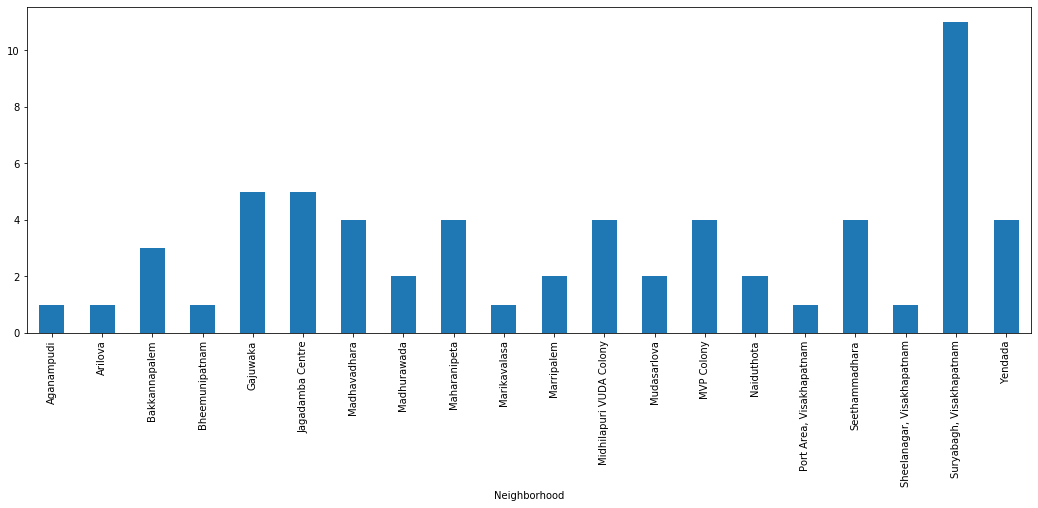

In [26]:
df = Visakhapatnam_venues.groupby(['Neighborhood'], sort=False)['Venue'].count()
df.plot.bar(figsize=(18,6))

Analyze each neighborhood

In [27]:
# one hot encoding
vskp_onehot = pd.get_dummies(Visakhapatnam_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vskp_onehot['Neighborhood'] = Visakhapatnam_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vskp_onehot.columns[-1]] + list(vskp_onehot.columns[:-1])
vskp_onehot = vskp_onehot[fixed_columns]

vskp_onehot.head()

,Neighborhood,ATM,Bakery,Bookstore,Bus Station,Bus Stop,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,...,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Restaurant,Shopping Mall,Smoke Shop,Spa,Trail
0,Aganampudi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Arilova,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Bakkannapalem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Bakkannapalem,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bakkannapalem,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
vskp_onehot['Neighborhood']

0                   Aganampudi
1                      Arilova
2                Bakkannapalem
3                Bakkannapalem
4                Bakkannapalem
                ...           
57    Suryabagh, Visakhapatnam
58                     Yendada
59                     Yendada
60                     Yendada
61                     Yendada
Name: Neighborhood, Length: 62, dtype: object

In [29]:
vskp_onehot.shape

(62, 39)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [30]:
vskp_grouped = vskp_onehot.groupby('Neighborhood').mean().reset_index()
vskp_grouped

,Neighborhood,ATM,Bakery,Bookstore,Bus Station,Bus Stop,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,...,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Restaurant,Shopping Mall,Smoke Shop,Spa,Trail
0,Aganampudi,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.00,0.00
1,Arilova,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,...,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.00
2,Bakkannapalem,0.00,0.00,0.0,0.00,0.0,0.333333,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.00,0.00
3,Bheemunipatnam,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.00,0.00
4,Gajuwaka,0.00,0.00,0.0,0.00,0.2,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.200000,0.2,0.0,0.0,0.000000,0.00,0.00
5,Jagadamba Centre,0.00,0.00,0.2,0.00,0.0,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.2,0.000000,0.0,0.0,0.2,0.000000,0.00,0.00
6,MVP Colony,0.00,0.00,0.0,0.25,0.0,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.00
7,Madhavadhara,0.25,0.25,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.00
8,Madhurawada,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.500000,0.00,0.00
9,Maharanipeta,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.25,0.00


Let's print each neighborhood along with the top 5 most common venues

In [31]:
num_top_venues = 5

for hood in vskp_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = vskp_grouped[vskp_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aganampudi----
            venue  freq
0     Pizza Place   1.0
1             ATM   0.0
2            Park   0.0
3     IT Services   0.0
4  Ice Cream Shop   0.0


----Arilova----
               venue  freq
0        Pet Service   1.0
1               Park   0.0
2        IT Services   0.0
3     Ice Cream Shop   0.0
4  Indian Restaurant   0.0


----Bakkannapalem----
        venue  freq
0  Smoke Shop  0.33
1  Campground  0.33
2    Pharmacy  0.33
3         ATM  0.00
4        Park  0.00


----Bheemunipatnam----
            venue  freq
0      Restaurant   1.0
1             ATM   0.0
2            Park   0.0
3     IT Services   0.0
4  Ice Cream Shop   0.0


----Gajuwaka----
                 venue  freq
0          IT Services   0.2
1             Bus Stop   0.2
2          Pizza Place   0.2
3             Pharmacy   0.2
4  Fried Chicken Joint   0.2


----Jagadamba Centre----
               venue  freq
0  Electronics Store   0.2
1          Bookstore   0.2
2      Shopping Mall   0.2
3          Pet S

Lets put this in dataframe

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vskp_grouped['Neighborhood']

for ind in np.arange(vskp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vskp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aganampudi,Pizza Place,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner
1,Arilova,Pet Service,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner
2,Bakkannapalem,Smoke Shop,Pharmacy,Campground,Trail,Diner,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant
3,Bheemunipatnam,Restaurant,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner
4,Gajuwaka,Fried Chicken Joint,IT Services,Pizza Place,Pharmacy,Bus Stop,Trail,Diner,Garden Center,Food Court,Fast Food Restaurant


# Cluster Neighborhood

In [34]:
from sklearn.cluster import KMeans

In [35]:
cl_range = range(1,10)
cl_error = []
vskp_grouped_clustering = vskp_grouped.drop('Neighborhood', 1)
for i in cl_range:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(vskp_grouped_clustering)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    cl_error.append(kmeans.inertia_)

df_kmeans = pd.DataFrame({"range": cl_range,"errors":cl_error})

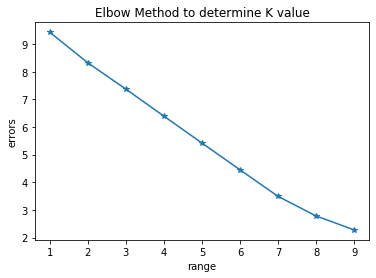

In [36]:
plt.plot(df_kmeans['range'],df_kmeans['errors'],marker='*')
plt.xlabel('range')
plt.ylabel('errors')
plt.title("Elbow Method to determine K value")
plt.show()

In [37]:
# set number of clusters
kclusters = 6

vskp_grouped_clustering = vskp_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vskp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 0, 1, 1, 1, 1, 0, 0, 1])

In [38]:
neig_df.columns

Index(['Locality', 'Latitudes', 'Longitudes'], dtype='object')

In [39]:
neighborhoods_venues_sorted.columns

Index(['Neighborhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [40]:
neig_df=neig_df.rename(columns={'Locality' : 'Neighborhood'})

In [41]:
neig_df.columns

Index(['Neighborhood', 'Latitudes', 'Longitudes'], dtype='object')

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
analyzedf_merged = neig_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
analyzedf_merged = analyzedf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

analyzedf_merged.head() # check the last columns!

,Neighborhood,Latitudes,Longitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adavivaram,17.78583,83.25242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aganampudi,17.68904,83.13988,2.0,Pizza Place,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner
2,Arilova,17.76843,83.31107,3.0,Pet Service,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner
3,Bakkannapalem,17.80368,83.33904,0.0,Smoke Shop,Pharmacy,Campground,Trail,Diner,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant
4,Bheemunipatnam,17.88938,83.45031,1.0,Restaurant,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner


In [62]:
analyzedf_merged.dropna(inplace=True)
print(analyzedf_merged)

                  Neighborhood  Latitudes  Longitudes  Cluster Labels  \
1                   Aganampudi  17.689040   83.139880             2.0   
2                      Arilova  17.768430   83.311070             3.0   
3                Bakkannapalem  17.803680   83.339040             0.0   
4               Bheemunipatnam  17.889380   83.450310             1.0   
7                     Gajuwaka  17.680830   83.202090             1.0   
8             Jagadamba Centre  17.715800   83.307500             1.0   
11                Madhavadhara  17.747730   83.257170             0.0   
12                 Madhurawada  17.808170   83.343620             0.0   
13                Maharanipeta  17.708290   83.310330             1.0   
14                Marikavalasa  17.838500   83.358680             5.0   
15                  Marripalem  17.740510   83.248690             0.0   
16     Midhilapuri VUDA Colony  17.750050   83.251410             0.0   
17                 Mudasarlova  17.764530   83.3032

Visualize the Clusters in map

In [44]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [63]:
# create map
map_clusters = folium.Map(location=[vskp_lat, vskp_lng], zoom_start=11)
# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(analyzedf_merged['Latitudes'], analyzedf_merged['Longitudes'], analyzedf_merged['Neighborhood'], analyzedf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Lets examine cluster 1



In [46]:
analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 0, analyzedf_merged.columns[[1] + list(range(5, analyzedf_merged.shape[1]))]]

,Latitudes,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,17.80368,Pharmacy,Campground,Trail,Diner,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant
11,17.74773,Gym,Bakery,ATM,Restaurant,Coffee Shop,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant
12,17.80817,Pharmacy,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store
15,17.74051,Pharmacy,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner
16,17.75005,Bakery,Garden Center,Pharmacy,Diner,Golf Course,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store
23,17.71927,Diner,Grocery Store,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Coffee Shop


In [47]:
cluster1 = analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 0, analyzedf_merged.columns[[1] + 
                                                                                    list(range(4, analyzedf_merged.shape[1]))]]
venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']).append(
    cluster1['8th Most Common Venue']).append(
    cluster1['9th Most Common Venue']).append(
    cluster1['10th Most Common Venue']))

print(venues1.value_counts().head(10))

Garden Center           6
Food Court              6
Fast Food Restaurant    6
Fried Chicken Joint     6
Golf Course             5
Coffee Shop             4
Diner                   4
Pharmacy                4
Electronics Store       4
ATM                     4
dtype: int64


In [48]:
analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 1, analyzedf_merged.columns[[1] + list(range(5, analyzedf_merged.shape[1]))]]

,Latitudes,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,17.889380,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner
7,17.680830,IT Services,Pizza Place,Pharmacy,Bus Stop,Trail,Diner,Garden Center,Food Court,Fast Food Restaurant
8,17.715800,Bookstore,Hotel,Pet Store,Electronics Store,Trail,Diner,Garden Center,Fried Chicken Joint,Food Court
13,17.708290,Hotel,Indian Restaurant,Food Court,Grocery Store,Golf Course,Garden Center,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
17,17.764530,Golf Course,Coffee Shop,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner,Trail
18,17.743690,Ice Cream Shop,Indian Restaurant,Food Court,Trail,Electronics Store,Golf Course,Garden Center,Fried Chicken Joint,Fast Food Restaurant
19,17.754101,Indian Restaurant,Trail,Diner,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store
22,17.740670,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Diner,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Electronics Store
25,17.711910,Hotel,Indian Restaurant,Indie Movie Theater,Movie Theater,Fast Food Restaurant,Clothing Store,Fried Chicken Joint,Food Court,Electronics Store
26,17.782230,Diner,Indian Restaurant,Grocery Store,Bus Station,Bus Stop,Campground,Chinese Restaurant,Clothing Store,Gym


In [49]:
cluster2 = analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 1, analyzedf_merged.columns[[1] + 
                                                                                    list(range(4, analyzedf_merged.shape[1]))]]
venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']).append(
    cluster2['8th Most Common Venue']).append(
    cluster2['9th Most Common Venue']).append(
    cluster2['10th Most Common Venue']))

print(venues2.value_counts().head(10))

Food Court              9
Fried Chicken Joint     9
Fast Food Restaurant    8
Electronics Store       8
Garden Center           8
Trail                   7
Diner                   7
Golf Course             6
Indian Restaurant       6
Hotel                   3
dtype: int64


In [50]:
analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 2, analyzedf_merged.columns[[1] + list(range(5, analyzedf_merged.shape[1]))]]

,Latitudes,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,17.68904,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner


In [51]:
cluster3 = analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 2, analyzedf_merged.columns[[1] + 
                                                                                    list(range(4, analyzedf_merged.shape[1]))]]
venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']).append(
    cluster3['8th Most Common Venue']).append(
    cluster3['9th Most Common Venue']).append(
    cluster3['10th Most Common Venue']))

print(venues3.value_counts().head(10))

Coffee Shop             1
Golf Course             1
Diner                   1
Fast Food Restaurant    1
Pizza Place             1
Garden Center           1
Food Court              1
Trail                   1
Fried Chicken Joint     1
Electronics Store       1
dtype: int64


In [52]:
analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 3, analyzedf_merged.columns[[1] + list(range(5, analyzedf_merged.shape[1]))]]

,Latitudes,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,17.76843,Trail,Coffee Shop,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Diner


In [53]:
cluster4 = analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 3, analyzedf_merged.columns[[1] + 
                                                                                    list(range(4, analyzedf_merged.shape[1]))]]
venues4 = (cluster4['1st Most Common Venue'].append(
    cluster4['2nd Most Common Venue']).append(
    cluster4['3rd Most Common Venue']).append(
    cluster4['4th Most Common Venue']).append(
    cluster4['5th Most Common Venue']).append(
    cluster4['6th Most Common Venue']).append(
    cluster4['7th Most Common Venue']).append(
    cluster4['8th Most Common Venue']).append(
    cluster4['9th Most Common Venue']).append(
    cluster4['10th Most Common Venue']))

print(venues4.value_counts().head(10))

Coffee Shop             1
Golf Course             1
Pet Service             1
Diner                   1
Fast Food Restaurant    1
Food Court              1
Garden Center           1
Trail                   1
Fried Chicken Joint     1
Electronics Store       1
dtype: int64


In [54]:
analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 4, analyzedf_merged.columns[[1] + list(range(5, analyzedf_merged.shape[1]))]]

,Latitudes,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,17.69244,Diner,Grocery Store,Golf Course,Garden Center,Fried Chicken Joint,Food Court,Fast Food Restaurant,Electronics Store,Trail


In [55]:
cluster5 = analyzedf_merged.loc[analyzedf_merged['Cluster Labels'] == 4, analyzedf_merged.columns[[1] + 
                                                                                    list(range(4, analyzedf_merged.shape[1]))]]
venues5 = (cluster5['1st Most Common Venue'].append(
    cluster5['2nd Most Common Venue']).append(
    cluster5['3rd Most Common Venue']).append(
    cluster5['4th Most Common Venue']).append(
    cluster5['5th Most Common Venue']).append(
    cluster5['6th Most Common Venue']).append(
    cluster5['7th Most Common Venue']).append(
    cluster5['8th Most Common Venue']).append(
    cluster5['9th Most Common Venue']).append(
    cluster5['10th Most Common Venue']))

print(venues5.value_counts().head(10))

Harbor / Marina         1
Grocery Store           1
Diner                   1
Electronics Store       1
Golf Course             1
Food Court              1
Garden Center           1
Trail                   1
Fried Chicken Joint     1
Fast Food Restaurant    1
dtype: int64


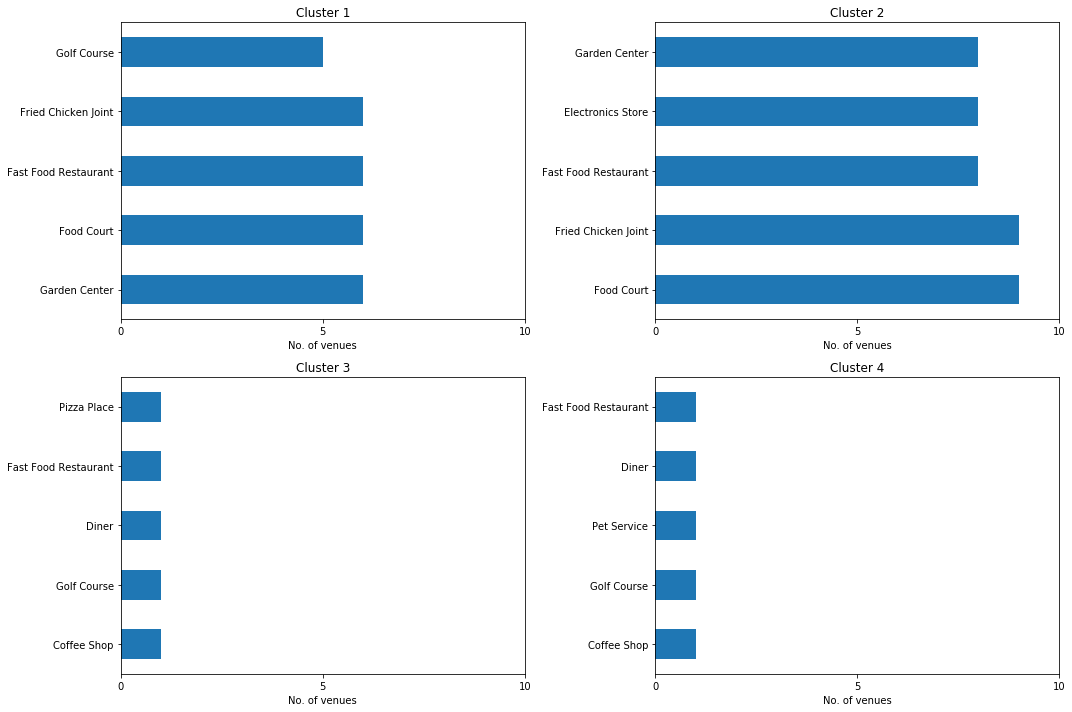

In [64]:

df_list = [venues1 ,venues2, venues3, venues4, venues5]
fig, axes = plt.subplots(2, 2)

count = 0
for r in range(2):
    for c in range(2):
        df_list[count].value_counts().head().plot.barh(ax = axes[r,c], width=0.5, figsize=(15,10))
        axes[r,c].set_title('Cluster {}'.format(count+1))
        plt.sca(axes[r, c])
        plt.xticks(np.arange(0, 15, 5))
        plt.xlabel('No. of venues')
        count += 1

fig.tight_layout()

In [65]:
analyzedf_merged.columns

Index(['Neighborhood', 'Latitudes', 'Longitudes', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [67]:
# create map
vskp_clusters_map = folium.Map(location=[vskp_lat, vskp_lng], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(analyzedf_merged['Latitudes'], analyzedf_merged['Longitudes'], analyzedf_merged['Neighborhood'], analyzedf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(vskp_clusters_map)
       
vskp_clusters_map

In [ ]:
Conclusion : 
After going through the neighborhoods of Visakhapatnam,India and looking the cluster information , cluster1 is already eccuped with good number of restuarants, grocery,food and women store but see an oppurtunity for someone to start of with a Gym which is missing in the cluster.Where as starting with restuarant , clothing business as an oppurtunity to start in cluser2,3,4 considering the less competition and uniqueness of the business. 

